In [4]:
%config IPCompleter.use_jedi=False

import numpy as np
import pandas as pd
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

covid = pd.read_csv(r"C:\Users\busani\Downloads\WHO-COVID-19-global-data.csv")
covid.head(5)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


##### Data Audit

In [5]:
covid.shape

(241740, 8)

In [6]:
covid.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,2.417400e+05,2.417400e+05,241740.000000,2.417400e+05
mean,2.574623e+03,9.213251e+05,27.088988,1.432164e+04
std,1.630283e+04,4.488275e+06,150.641294,6.384808e+04
min,-3.295200e+04,0.000000e+00,-2437.000000,0.000000e+00
25%,0.000000e+00,6.320000e+02,0.000000,6.000000e+00
50%,2.000000e+01,1.841100e+04,0.000000,2.300000e+02
75%,4.700000e+02,2.523728e+05,5.000000,3.910000e+03
max,1.265520e+06,9.565360e+07,11447.000000,1.053917e+06


In [7]:
covid.isna().sum()

Date_reported           0
Country_code         1020
Country                 0
WHO_region              0
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64

In [8]:
#DATA MANIPULATION
#Converting date from string "str" to datetime

covid["Date_reported"]= pd.to_datetime(covid["Date_reported"])

In [9]:
#Checking latest date

covid["Date_reported"].max()

Timestamp('2022-10-18 00:00:00')

In [10]:
#Checking earliest date 
covid.Date_reported.min()

Timestamp('2020-01-03 00:00:00')

In [11]:
# Checking time between earliest and latest dates
covid.Date_reported.max() - covid.Date_reported.min()

Timedelta('1019 days 00:00:00')

##### Covid as at 2022-10-18 worldwide

In [12]:
 #Worldwide Data to date
world = covid[covid["Date_reported"]== covid["Date_reported"].max()]
world.head(5)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1019,2022-10-18,AF,Afghanistan,EMRO,149,201385,0,7811
2039,2022-10-18,AL,Albania,EURO,7,331499,0,3592
3059,2022-10-18,DZ,Algeria,AFRO,0,270746,0,6881
4079,2022-10-18,AS,American Samoa,WPRO,0,8251,0,34
5099,2022-10-18,AD,Andorra,EURO,0,46366,0,155


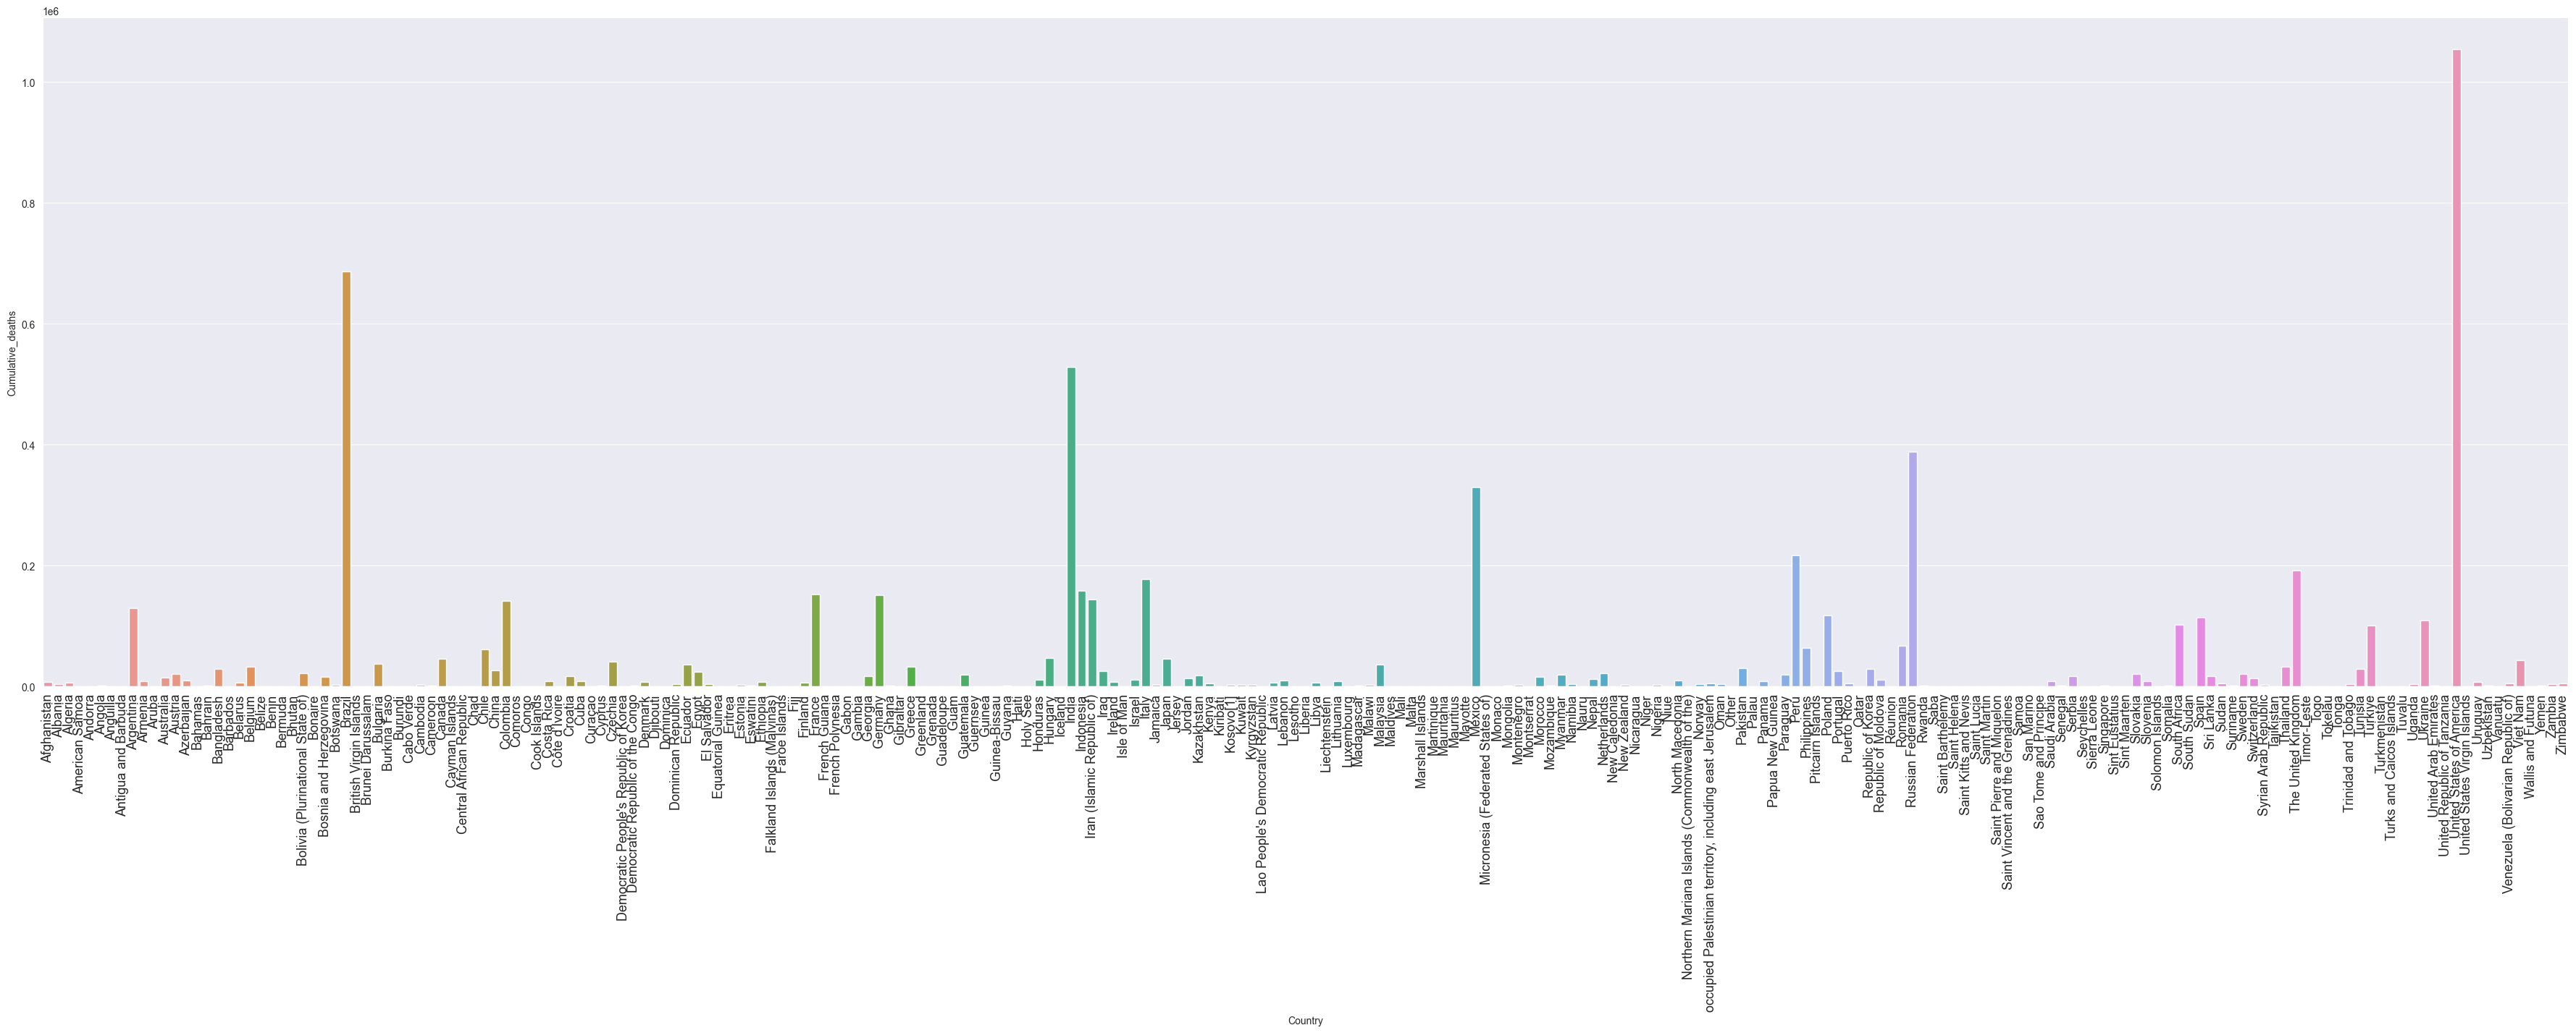

In [26]:
#Visualization of Cumulative deaths in each country worldwide
plt.figure(figsize=(45,12))
sns.barplot(x=world["Country"], y=world["Cumulative_deaths"])

plt.xticks(rotation="vertical", size=13)
plt.show()


#### Which 10 countries have the highest Cumulative deaths to date

In [14]:
worlds_10 = world.sort_values(by="Cumulative_deaths",ascending=False).head(10)
worlds_10


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
231539,2022-10-18,US,United States of America,AMRO,11151,95653603,8,1053917
29579,2022-10-18,BR,Brazil,AMRO,380,34749058,2,687155
98939,2022-10-18,IN,India,SEARO,1542,44632430,8,528913
179519,2022-10-18,RU,Russian Federation,EURO,9474,21324431,91,389084
137699,2022-10-18,MX,Mexico,AMRO,0,7102947,0,330277
168299,2022-10-18,PE,Peru,AMRO,193,4150737,17,216877
216239,2022-10-18,GB,The United Kingdom,EURO,0,23798797,0,191681
106079,2022-10-18,IT,Italy,EURO,14030,23114013,93,178081
99959,2022-10-18,ID,Indonesia,SEARO,2164,6460265,18,158345
74459,2022-10-18,FR,France,EURO,9421,35225269,112,152398


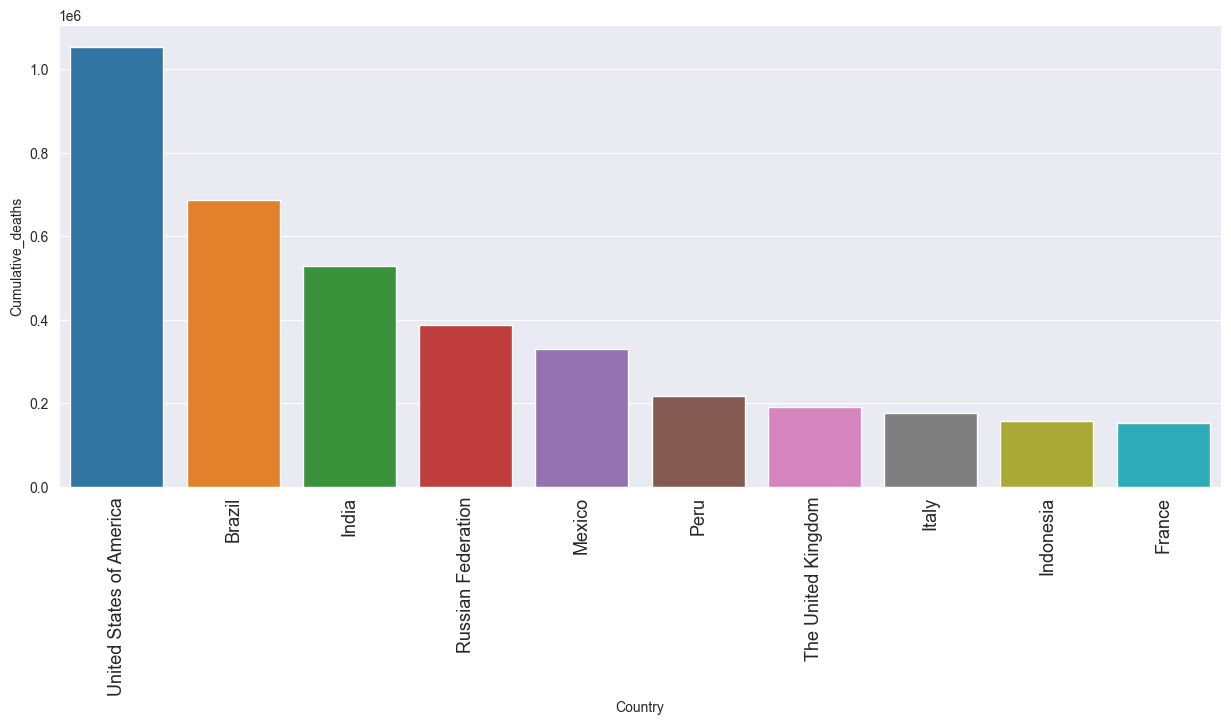

In [15]:
#Visializing the 10 countries with highest Cumulative deaths
plt.figure(figsize=(15,6))
sns.barplot(x=worlds_10["Country"], y=worlds_10["Cumulative_deaths"])
plt.xticks(rotation="vertical", size=13)
plt.show()


#### Slicing Eswatini data 

In [16]:
Eswatni = covid[covid["Country"]== "Eswatini"]
Eswatni

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
67320,2020-01-03,SZ,Eswatini,AFRO,0,0,0,0
67321,2020-01-04,SZ,Eswatini,AFRO,0,0,0,0
67322,2020-01-05,SZ,Eswatini,AFRO,0,0,0,0
67323,2020-01-06,SZ,Eswatini,AFRO,0,0,0,0
67324,2020-01-07,SZ,Eswatini,AFRO,0,0,0,0
...,...,...,...,...,...,...,...,...
68335,2022-10-14,SZ,Eswatini,AFRO,0,73436,0,1422
68336,2022-10-15,SZ,Eswatini,AFRO,0,73436,0,1422
68337,2022-10-16,SZ,Eswatini,AFRO,0,73436,0,1422
68338,2022-10-17,SZ,Eswatini,AFRO,0,73436,0,1422


#### Eswatini Data for 2022

In [17]:
Eswatini_2 = Eswatni[Eswatni["Date_reported"] > "2021-12-31"] 

In [18]:
Eswatini_2 

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
68049,2022-01-01,SZ,Eswatini,AFRO,277,66109,4,1303
68050,2022-01-02,SZ,Eswatini,AFRO,132,66241,5,1308
68051,2022-01-03,SZ,Eswatini,AFRO,45,66286,2,1310
68052,2022-01-04,SZ,Eswatini,AFRO,155,66441,5,1315
68053,2022-01-05,SZ,Eswatini,AFRO,233,66674,3,1318
...,...,...,...,...,...,...,...,...
68335,2022-10-14,SZ,Eswatini,AFRO,0,73436,0,1422
68336,2022-10-15,SZ,Eswatini,AFRO,0,73436,0,1422
68337,2022-10-16,SZ,Eswatini,AFRO,0,73436,0,1422
68338,2022-10-17,SZ,Eswatini,AFRO,0,73436,0,1422


In [19]:
Eswatini_2.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,291.000000,291.000000,291.000000,291.000000
mean,26.130584,71309.422680,0.422680,1400.611684
std,37.929383,2130.317105,1.018806,23.155480
min,0.000000,66109.000000,0.000000,1303.000000
25%,2.000000,69447.000000,0.000000,1392.000000
50%,13.000000,72300.000000,0.000000,1406.000000
75%,33.000000,73299.000000,0.000000,1418.000000
max,277.000000,73436.000000,6.000000,1422.000000


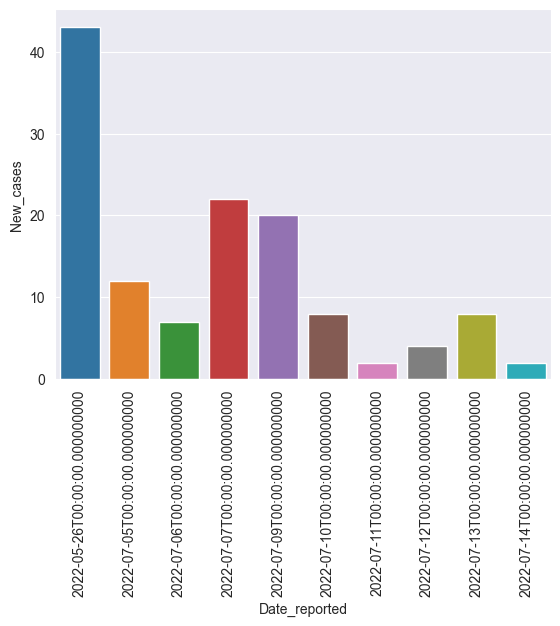

In [20]:
# Top 10 worse days in Eswatini 2022

top_10_days = Eswatini_2.sort_values(by="New_deaths").head(10)
sns.barplot(x="Date_reported", y="New_cases", data=top_10_days)
plt.xticks(rotation="vertical")
plt.show()

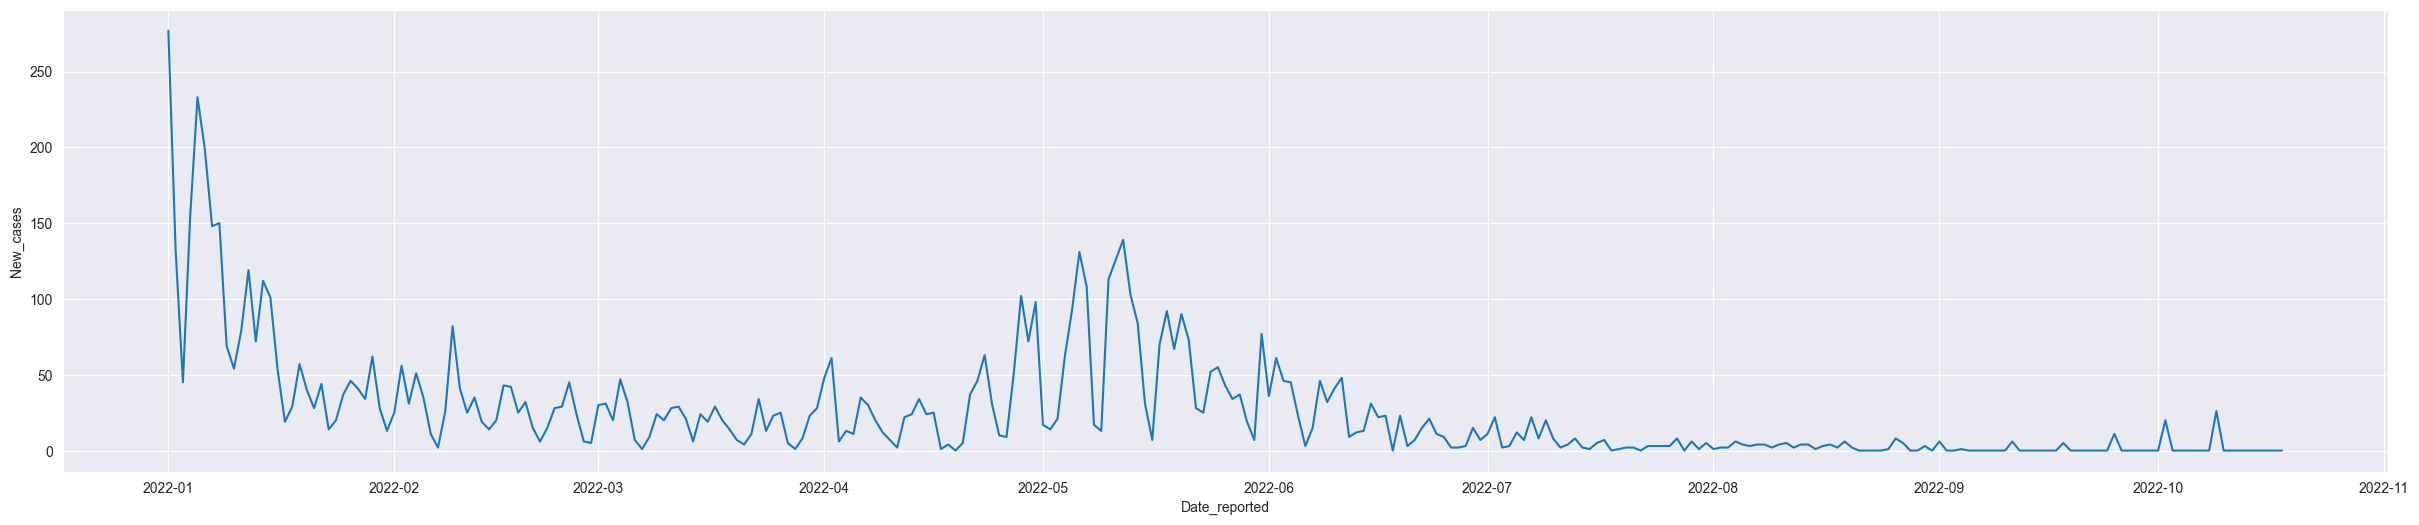

In [25]:
# Visualizing Eswatini covid trend of 2022
plt.figure(figsize=(30,6))
sns.lineplot(data=Eswatini_2, x="Date_reported", y="New_cases")
plt.show()